<a href="https://colab.research.google.com/github/vaibhavj50/Titanic-Survival-Prediction/blob/main/titanic_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
titanic_data = pd.read_csv('/content/train.csv')

#survival - Survival (0 = No; 1 = Yes)
#class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#name - Name
#sex - Sex
#age - Age
#sibsp - Number of Siblings/Spouses Aboard
#parch - Number of Parents/Children Aboard
#ticket - Ticket Number
#fare - Passenger Fare
#cabin - Cabin
#embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#boat - Lifeboat (if survived)
#body - Body number (if did not survive and body was recovered)

#SibSp is the number of siblings or spouse of a person onboard

#Parch Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with

In [68]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
titanic_data.shape

(891, 12)

In [70]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [74]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [75]:
titanic_data['Fare'].nunique

<bound method IndexOpsMixin.nunique of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [76]:
titanic_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [77]:
titanic_data['Cabin'].nunique()

147

In [78]:
titanic_data['Pclass'].nunique()

3

In [79]:
titanic_data['Cabin'].value_counts().head(50)

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

Out of 204 Cabin value given , there are 147 unique value , so it was not possible to fill the 687 values missing .   

In [80]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [81]:
titanic_data['Age'].max()

80.0

age imputation

In [84]:
from sklearn.impute import KNNImputer

In [86]:
titanic_data = titanic_data.drop(['PassengerId','Name'],axis=1)
titanic_data = titanic_data[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]
titanic_data["Sex"] = [1 if x=="male" else 0 for x in titanic_data["Sex"]]

In [104]:
imputer = KNNImputer(n_neighbors=5)
Age = imputer.fit_transform(titanic_data[['Age']]).astype(int)

In [91]:
df=imputer.transform(titanic_data)

In [106]:
titanic_data['Age'] = Age

In [107]:
titanic_data.isna().any()

Survived    False
Pclass      False
Sex         False
SibSp       False
Parch       False
Fare        False
Age         False
dtype: bool

In [114]:
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

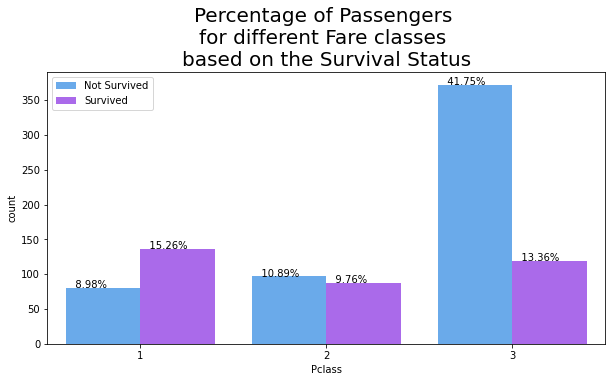

In [115]:
bar_plot('Pclass', titanic_data, 'cool', 
         "Percentage of Passengers \nfor different Fare classes \nbased on the Survival Status", 
         (10, 5), 3, 'Survived')

plt.legend(loc='upper left', labels=['Not Survived', 'Survived']);

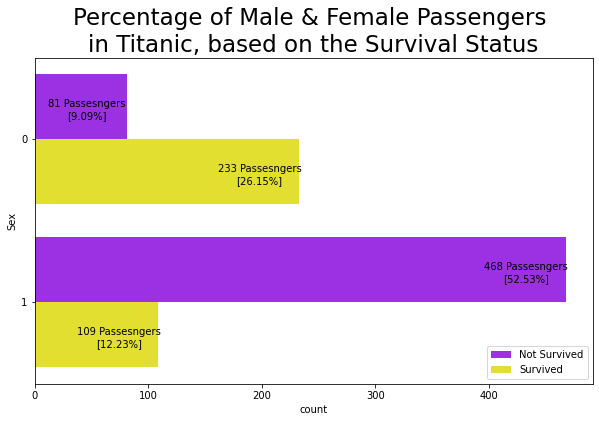

In [138]:
horizontal_bar_plot('Sex', titanic_data, ['#a114ff', '#fffb14'], 
                    'Percentage of Male & Female Passengers \nin Titanic, based on the Survival Status',
                    (-35, 0.55), (10, 6), 'Survived')

plt.legend(loc='lower right', labels=['Not Survived', 'Survived']);

From the above figure it is inferred that majority of the passengers (41.75%) who were travelling in Economy(3rd) Class of Titanic were not able to survive.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


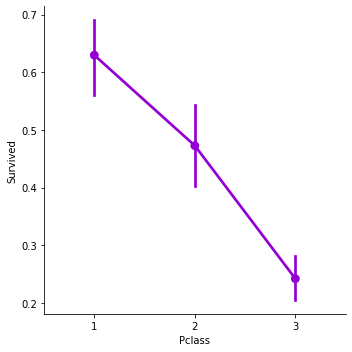

In [117]:
sns.catplot('Pclass','Survived',data=titanic_data, kind='point', color='darkviolet');

The Survival rate of Premium(1st) Class passengers is higher than other two passenger classes.
The passengers of Economy(3rd) Class had least Survival rate.

In [135]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  # Create barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=color)
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/titanic_data[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

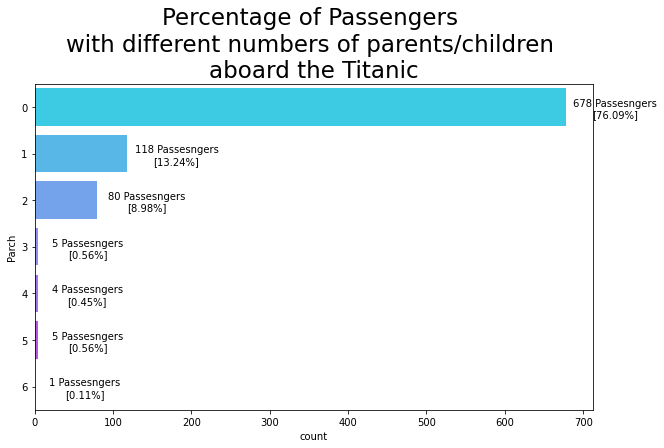

In [136]:
horizontal_bar_plot('Parch', titanic_data, 'cool', 
                    "Percentage of Passengers \nwith different numbers of parents/children \naboard the Titanic",
                    (63, 0.55), (10, 6))

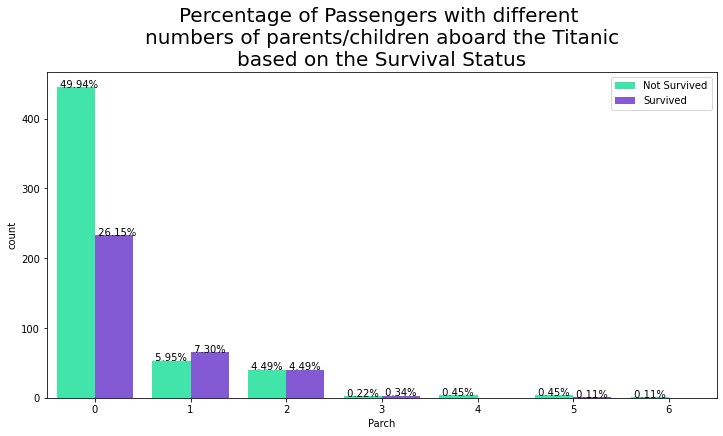

In [125]:
bar_plot('Parch', titanic_data, ['#26ffb0', '#7c46e8'],
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on the Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

#Around 50% of the total passengers in Titanic who were travelling alone, not able to survive.

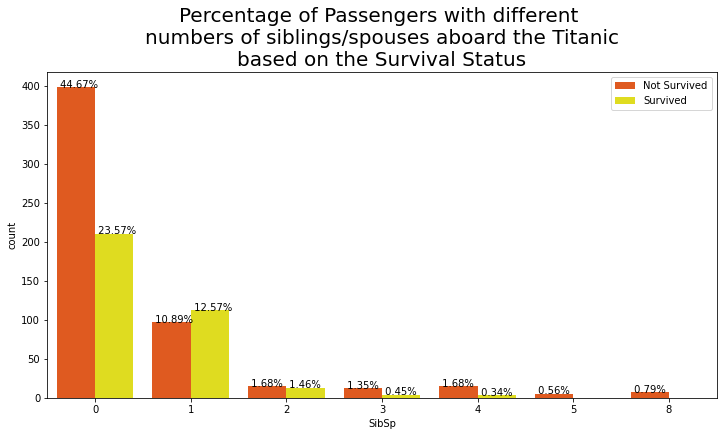

In [130]:
bar_plot('SibSp', titanic_data, ['#ff4d00', '#fffb00'],
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on the Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

#45% of the total passengers in Titanic who were travelling alone (i.e., not travelling with their siblings/spouses) not able to survive.

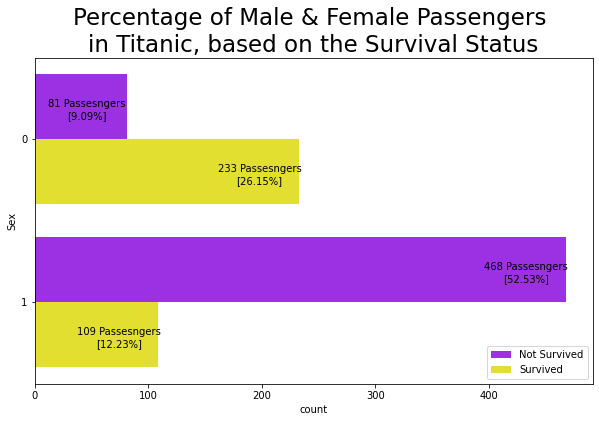

#52.53% of the total passenger in Titanic who were not able to survive was Male.